# Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import pathlib
import cv2
import tensorflow as tf
import random 

from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import *

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Explore the images from image preparation

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
# img_loc = 'C:/Users/Asus/Documents/Thesis/Me/Dataset'
# Root directory of the project
ROOT_DIR = os.path.abspath("../")
img_loc = "gdrive/MyDrive/NewThesis_Poonyawat_Woottisart/val_dataset_filtered"
print(img_loc)

gdrive/MyDrive/NewThesis_Poonyawat_Woottisart/val_dataset_filtered


In [4]:
data_dir = pathlib.Path(img_loc)

In [5]:
data_dir

PosixPath('gdrive/MyDrive/NewThesis_Poonyawat_Woottisart/val_dataset_filtered')

In [6]:
# img_eu_loc = img_loc + '/european-street-fashion-output'
# img_jp_loc = img_loc + '/harajuku-kawaii-street-fashion-output'
# img_th_loc = img_loc + '/thai-street-fashion-output'

img_jp_loc = img_loc + '/ha-output/test'
img_th_loc = img_loc + '/th-output/test'

In [7]:
img_jp_loc

'gdrive/MyDrive/NewThesis_Poonyawat_Woottisart/val_dataset_filtered/ha-output/test'

In [8]:
dim_i_list = []
dim_j_list = []
img_list = []
label_list = []
idx = 0

#### THAI

In [9]:
for img_name in list(os.listdir(img_th_loc)):
    img_loc = '{}/{}'.format(img_th_loc, img_name)
    img = cv2.imread(img_loc)
    print('{}: {} - {}'.format(img_loc, img.shape, idx))
    dim_i_list.append(img.shape[0])
    dim_j_list.append(img.shape[1])
    img_list.append(img)
    label_list.append(0)
    idx = idx+1

gdrive/MyDrive/NewThesis_Poonyawat_Woottisart/val_dataset_filtered/th-output/test/test00000.png: (1076, 978, 3) - 0
gdrive/MyDrive/NewThesis_Poonyawat_Woottisart/val_dataset_filtered/th-output/test/test00002.png: (1033, 633, 3) - 1
gdrive/MyDrive/NewThesis_Poonyawat_Woottisart/val_dataset_filtered/th-output/test/test00001.png: (701, 240, 3) - 2
gdrive/MyDrive/NewThesis_Poonyawat_Woottisart/val_dataset_filtered/th-output/test/test00007.png: (951, 375, 3) - 3
gdrive/MyDrive/NewThesis_Poonyawat_Woottisart/val_dataset_filtered/th-output/test/test00008.png: (637, 272, 3) - 4
gdrive/MyDrive/NewThesis_Poonyawat_Woottisart/val_dataset_filtered/th-output/test/test00004.png: (563, 562, 3) - 5
gdrive/MyDrive/NewThesis_Poonyawat_Woottisart/val_dataset_filtered/th-output/test/test00005.png: (563, 562, 3) - 6
gdrive/MyDrive/NewThesis_Poonyawat_Woottisart/val_dataset_filtered/th-output/test/test00009.png: (903, 342, 3) - 7
gdrive/MyDrive/NewThesis_Poonyawat_Woottisart/val_dataset_filtered/th-output/t

#### KAWAII

In [10]:
for img_name in list(os.listdir(img_jp_loc)):
    img_loc = '{}/{}'.format(img_jp_loc, img_name)
    img = cv2.imread(img_loc)
    print('{}: {} - {}'.format(img_loc, img.shape, idx))
    dim_i_list.append(img.shape[0])
    dim_j_list.append(img.shape[1])
    img_list.append(img)
    label_list.append(1)
    idx = idx+1

gdrive/MyDrive/NewThesis_Poonyawat_Woottisart/val_dataset_filtered/ha-output/test/test00000.png: (466, 172, 3) - 222
gdrive/MyDrive/NewThesis_Poonyawat_Woottisart/val_dataset_filtered/ha-output/test/test00001.png: (831, 288, 3) - 223
gdrive/MyDrive/NewThesis_Poonyawat_Woottisart/val_dataset_filtered/ha-output/test/test00004.png: (820, 349, 3) - 224
gdrive/MyDrive/NewThesis_Poonyawat_Woottisart/val_dataset_filtered/ha-output/test/test00007.png: (721, 430, 3) - 225
gdrive/MyDrive/NewThesis_Poonyawat_Woottisart/val_dataset_filtered/ha-output/test/test00002.png: (831, 288, 3) - 226
gdrive/MyDrive/NewThesis_Poonyawat_Woottisart/val_dataset_filtered/ha-output/test/test00008.png: (702, 379, 3) - 227
gdrive/MyDrive/NewThesis_Poonyawat_Woottisart/val_dataset_filtered/ha-output/test/test00012.png: (698, 396, 3) - 228
gdrive/MyDrive/NewThesis_Poonyawat_Woottisart/val_dataset_filtered/ha-output/test/test00011.png: (552, 547, 3) - 229
gdrive/MyDrive/NewThesis_Poonyawat_Woottisart/val_dataset_filter

In [11]:
np.mean(dim_i_list), np.std(dim_i_list)

(869.9969604863222, 201.16249534849754)

In [12]:
np.mean(dim_j_list), np.std(dim_j_list)

(410.30699088145894, 172.27780274576506)

In [13]:
len(dim_i_list)

329

### From testing set

In [14]:
img_loc = "gdrive/MyDrive/NewThesis_Poonyawat_Woottisart/Dataset_Filtered_new"
img_eu_loc = img_loc + '/european-street-fashion-output'
img_jp_loc = img_loc + '/harajuku-kawaii-street-fashion-output'
img_th_loc = img_loc + '/thai-street-fashion-output'

In [15]:
img_list_test = []
# TH
img_name = 'test_00066.png'
img_loc = '{}/{}'.format(img_th_loc, img_name)
img = cv2.imread(img_loc)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('{}'.format(img_loc))
img_list_test.append(img)
# JP
img_name = 'test_00011.png'
img_loc = '{}/{}'.format(img_jp_loc, img_name)
img = cv2.imread(img_loc)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('{}'.format(img_loc))
img_list_test.append(img)
# EU
img_name = 'test_00000.png'
img_loc = '{}/{}'.format(img_eu_loc, img_name)
img = cv2.imread(img_loc)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('{}'.format(img_loc))
img_list_test.append(img)

gdrive/MyDrive/NewThesis_Poonyawat_Woottisart/Dataset_Filtered_new/thai-street-fashion-output/test_00066.png
gdrive/MyDrive/NewThesis_Poonyawat_Woottisart/Dataset_Filtered_new/harajuku-kawaii-street-fashion-output/test_00011.png
gdrive/MyDrive/NewThesis_Poonyawat_Woottisart/Dataset_Filtered_new/european-street-fashion-output/test_00000.png


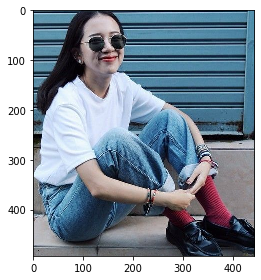

In [16]:
import skimage.io
skimage.io.imshow(img_list_test[0])

# Image Scaling

In [17]:
h = 420
w = 240

img_scaling = [np.zeros(shape=(h, w, 3)) for i in range(len(img_list))]
img_scaling_test = [np.zeros(shape=(h, w, 3)) for i in range(len(img_list_test))]
for i in range(len(img_list)):
    img_scaling[i] = cv2.resize(img_list[i], dsize=(w, h), interpolation = cv2.INTER_CUBIC)
for i in range(len(img_list_test)):
    img_scaling_test[i] = cv2.resize(img_list_test[i], dsize=(w, h), interpolation = cv2.INTER_CUBIC)

In [18]:
len(img_scaling), len(label_list)

(329, 329)

In [19]:
sample_test_jp = img_scaling[239]
sample_test_th = img_scaling[129]


sample_test_th_test = img_scaling[0]
sample_test_jp_test = img_scaling[1]
sample_test_eu_test = img_scaling[2]

In [20]:
len(img_scaling), len(img_scaling[0]), len(img_scaling[0][0]), len(img_scaling[0][0][0])

(329, 420, 240, 3)

# Functions

In [21]:
# network creating from given parameter
# input: 
#       number of layers in network (integer), 
#       list of infomation for each layer (list of dictionaries), 
#       list of number of nodes for each dense layer (list of integer(s)), 
#       (optional) list of pooling type for each layer (list of string)
# output: 
#       network topology

def gen_network(n_layers, layers_list, dense_layer_node_list, pooling_set=None): 
    
    # layer_list = list of layers those combined with n_node, padding, activation_fn
    
    return_network = [layers.Rescaling(1./255, input_shape=(h, w, 3))]
    
    # Convolutional Neural Network
    
    for i in range(n_layers):
        temp_conv = layers.Conv2D(layers_list[i]['n_node'], 3, padding=layers_list[i]['padding'], activation=layers_list[i]['activ_fn'])
        return_network.append(temp_conv)
        if(pooling_set==None):
            temp_pooling = layers.MaxPooling2D()
        return_network.append(temp_pooling)
    
    # Dense Layer
    
    return_network.append(layers.Flatten())
    
    for n_node_dense in dense_layer_node_list:
        temp_dense = layers.Dense(n_node_dense, activation='relu')
        return_network.append(temp_dense)
        
    return_network.append(layers.Dense(2))
    
    return return_network

In [22]:
# get model and model parameter from checkpoint
# input: filename (string)
# output: set of model parameters, model

def get_prev_model(filename):

    f = open('gdrive/MyDrive/Colab Notebooks/checkpoints/{}.txt'.format(filename), 'r')

    paramList = []

    for line in f:
        tmp = line.replace('\\n', '')
        paramList.append(line)

    f.close()

    tmp = paramList[1].strip('][').split(', ')
    paramList[1] = [None for i in range(len(tmp))]
    for i in range(len(tmp)):
        if(i%3==0):
            paramList[1][i] = tmp[i].split(': ')[1].replace('}', '')
        else:
            paramList[1][i] = tmp[i].split(': ')[1].replace('}', '').split('\'')[1]
    paramList[1][-1] = paramList[1][-1].split(']')[0]

    tmp = []
    idx = 0
    while(idx<len(paramList[1])):
        tmp.append({'n_node': int(paramList[1][idx]), 'padding': paramList[1][idx+1], 'activ_fn': paramList[1][idx+2]})
        idx = idx+3
    paramList[1] = tmp.copy()

    tmp = paramList[2].strip('][').split(', ')
    paramList[2] = []
    for i in range(len(tmp)-1):
        paramList[2].append(int(tmp[0]))
    paramList[2].append(int(tmp[-1].split(']')[0]))

    param_prev = np.array([int(paramList[0]), paramList[1], paramList[2]])

    net = gen_network(n_layers=int(paramList[0]), layers_list=paramList[1], dense_layer_node_list=paramList[2])
    model_prev = Sequential(net)
    model_prev.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['binary_accuracy'])
    model_prev.load_weights('gdrive/MyDrive/Colab Notebooks/checkpoints/{}'.format(filename))

    return param_prev, model_prev

# Run

In [23]:
best_param, best_model = get_prev_model('best_model')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


# Final Evaluation

In [24]:
# model evaluation process 
# input: model, list of testing images (list of image arrays), list of labels (list of integers (classes))
# output: -

def evaluate_final(model, x_test, y_test):
    # model.evaluate(x_test, y_test, verbose=2)

    probability_model = tf.keras.Sequential([
                                             model,
                                             tf.keras.layers.Softmax()])
    x_test = np.array(x_test, ndmin=4)
    pred_prob = probability_model(x_test).numpy()
    
    pred_class = []
    for i in range(len(pred_prob)):
        pred_class.append(np.where(pred_prob[i][0]>pred_prob[i][1], 0, 1))
        print('Actual: {} | Predicted: {} | Prob class 1: {}'.format(y_test[i], pred_class[i], pred_prob[i][1]))
    print(confusion_matrix(y_test, pred_class))
    acc_score = accuracy_score(y_test, pred_class)
    prec_score = precision_score(y_test, pred_class)
    rec_score = recall_score(y_test, pred_class)
    print('accuracy_score: {}'.format(acc_score))
    print('precision_score: {}'.format(prec_score))
    print('recall_score: {}'.format(rec_score))

    if((prec_score==0)&(rec_score==0)):
        f1_score = 0
    else:
        f1_score = 2*prec_score*rec_score/(prec_score+rec_score)


In [25]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 420, 240, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 420, 240, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 210, 120, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 210, 120, 4)       292       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 105, 60, 4)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 105, 60, 12)       4

In [26]:
evaluate_final(best_model, img_scaling, label_list)

Actual: 0 | Predicted: 0 | Prob class 1: 0.3522656261920929
Actual: 0 | Predicted: 0 | Prob class 1: 0.35245281457901
Actual: 0 | Predicted: 0 | Prob class 1: 0.41387316584587097
Actual: 0 | Predicted: 1 | Prob class 1: 0.5999691486358643
Actual: 0 | Predicted: 0 | Prob class 1: 0.48481008410453796
Actual: 0 | Predicted: 0 | Prob class 1: 0.4612838625907898
Actual: 0 | Predicted: 0 | Prob class 1: 0.3576144576072693
Actual: 0 | Predicted: 0 | Prob class 1: 0.3522656261920929
Actual: 0 | Predicted: 1 | Prob class 1: 0.5294602513313293
Actual: 0 | Predicted: 0 | Prob class 1: 0.40619567036628723
Actual: 0 | Predicted: 0 | Prob class 1: 0.3522656261920929
Actual: 0 | Predicted: 0 | Prob class 1: 0.44647324085235596
Actual: 0 | Predicted: 0 | Prob class 1: 0.4146122634410858
Actual: 0 | Predicted: 1 | Prob class 1: 0.5114571452140808
Actual: 0 | Predicted: 0 | Prob class 1: 0.3522656261920929
Actual: 0 | Predicted: 0 | Prob class 1: 0.3522656261920929
Actual: 0 | Predicted: 0 | Prob class 

# Example result from model (Testing Set)

In [27]:
probability_model = tf.keras.Sequential([
                                         best_model,
                                         tf.keras.layers.Softmax()])

In [35]:
prediction_jp_test = probability_model(sample_test_jp_test.reshape(1, h, w, 3)).numpy()
prediction_th_test = probability_model(sample_test_th_test.reshape(1, h, w, 3)).numpy()
prediction_eu_test = probability_model(sample_test_eu_test.reshape(1, h, w, 3)).numpy()

In [36]:
prediction_jp_test

array([[0.6475471, 0.3524529]], dtype=float32)

In [37]:
prediction_th_test

array([[0.64773434, 0.35226563]], dtype=float32)

In [38]:
prediction_eu_test

array([[0.5861268, 0.4138732]], dtype=float32)

# Example result from model (Validation Set)

In [32]:


prediction_jp = probability_model(sample_test_jp.reshape(1, h, w, 3)).numpy()
prediction_th = probability_model(sample_test_th.reshape(1, h, w, 3)).numpy()

In [33]:
prediction_jp

array([[0.07037066, 0.9296293 ]], dtype=float32)

In [34]:
prediction_th

array([[0.64773434, 0.35226563]], dtype=float32)